# Assignment 3 - Supervised Learning

## *Yifan Li*
Netid:  *yl506*

## 1
### [40 points] From theory to practice: classification through logistic regression

#### Introduction
For this problem you will derive, implement through gradient descent, and test the performance of a logistic regression classifier for a binary classification problem.

In this case, we'll assume our logistic regression problem will be applied to a two dimensional feature space. Our logistic regression model is:

$$f(\mathbf{x}_i,\mathbf{w})=\sigma(\mathbf{w}^T \mathbf{x}_i)$$

where the sigmoid function is defined as $\sigma(x) = \frac{e^x}{1+e^x}$. Also, since this is a two-dimensional problem, we define $\mathbf{w}^T \mathbf{x}_i = w_0 x_{i,0} + w_1 x_{i,1} + w_2 x_{i,2}$ and here, $x_{i,0} \triangleq 1$

As in class, we will interpret the response of the logistic regression classifier to be the likelihood of the data given the model. For one sample, $(y_i, \mathbf{x_i})$, this is given as:

$$P(Y=y_i|X=x_i) = f(\mathbf{x}_i,\mathbf{w})=\sigma(\mathbf{w}^T \mathbf{x}_i)$$

#### Find the cost function that we can use to choose the model paramters, $\mathbf{w}$, that best fit the training data.

**(a)** What is the likelihood function of the data that we will wish to maximize?

**(b)** Since a logarithm is a monotonic function, maximizing the $f(x)$ is equivalent to maximizing $\ln [f(x)]$. Express part (a) as a cost function of the model parameters, $C(\mathbf{w})$, that is the negative of the logarithm of (a).

**(c)** Calculate the gradient of the cost function with respect to the model parameters $\nabla_{\mathbf{w}}C(\mathbf{w})$. Express this in terms of the partial dervatives of the cost function with respect to each of the parameters, e.g. $\nabla_{\mathbf{w}}C(\mathbf{w}) = \left[\frac{\partial C}{\partial w_0}, \frac{\partial C}{\partial w_1}, \frac{\partial C}{\partial w_2}\right]$.

**(d)** Write out the gradient descent update equation, assuming $\eta$ represents the learning rate.

#### Prepare and plot your data

**(e)** Load the data and scatter plot the data by class. In the data folder in the same directory of this notebook, you'll find the data in `A3_Q1_data.csv`. This file contains the binary class labels, $y$, and the features $x_1$ and $x_2$.  Comment on the data: do the data appear seperable? Why might logistic regression be a good choice for these data or not?

**(f)** Do the data require any preprocessing due to missing values, scale differences, etc? If so, how did you remediate this?

#### Implement gradient descent and your logistic regression algorithm

**(g)** Create a function or class to implement your logistic regression. It should take as inputs the model parameters, $\mathbf{w}=\left[w_0,w_1,w_2\right]$, and output the class confidence probabilities, $P(Y=y_i|X=x_i)$.

**(h)** Create a function that computes the cost function $C(\mathbf{w})$ for a given dataset and corresponding class labels.

**(i)** Create a function or class to run gradient descent on your training data. We'll refer to this as "batch" gradient descent since it takes into account the gradient based on all our data at each iteration of the algorithm. Divide you data into a training and testing set where the test set accounts for 30 percent of the data and the training set the remaining 70 percent. In doing this you'll need to make some assumptions / experiment with the following:
1. The initialization of the algorithm - what should you initialize the model parameters to?
2. The learning rate - how slow/fast should the algorithm proceed in the direction opposite the gradient?
3. Stopping criteria - when should the algorithm be finished searching for the optimum?

**(j)** At each step in the gradient descent algorithm it will produce updated parameter estimates. For each set of estimates, calculate the cost function for both the training and the test data. 

**(k)** Show this process for different initializations, learning rates, and stopping criteria. What is the impact that each parameter has on the process and the results? What choices did you make in your chosen approach and why?

#### Test your model performance through cross validation

**(l)** Test the performance of your trained classifier using K-folds cross validation (while this can be done manually, the scikit-learn package [StratifiedKFolds](http://scikit-learn.org/stable/modules/generated/sklearn.model_selection.StratifiedKFold.html#sklearn.model_selection.StratifiedKFold) may be helpful). Produce Receiver Operating Characteristic Curves (ROC curves) of your cross validated performance. 

**(m)** Why do we use cross validation?

**(n)** Make two plots - one of your training data, and one for your test data - with the data scatterplotted and the decision boundary for your classifier. Comment on your decision boundary. Could it be improved?

**(o)** Compare your trained model to random guessing as well as using linear regression. Show ROC curves for both and your model all on one plot. How does your model compare in terms of performance?

**ANSWER**

**(a)** The likelihood function we want to maximize is  
$$ P(\mathbf{y}|\mathbf{x};\mathbf{w}) = \prod_{i=1}^N (\sigma(\mathbf{w}^T\mathbf{x}_i))^{y_i} [1-\sigma(\mathbf{w}^T\mathbf{x}_i)]^{(1-y_i)} $$

**(b)** $$ C(\mathbf{w}) = - log{P(\mathbf{y}|\mathbf{x};\mathbf{w})} $$
    take the logarithm of $ P(\mathbf{y}|\mathbf{x})$ from part (a), and then take the negative value,
   
   we have $$ C(\mathbf{w}) = - ( \sum\limits_{i=1}^N y_i log\sigma(\mathbf{w}^T\mathbf{x}_i) + (1-y_i)log[1-\sigma(\mathbf{w}^T\mathbf{x}_i)] )$$
   
**(c)** $$ \nabla_{\mathbf{w}}C(\mathbf{w}) = \frac{\partial C(\mathbf{w})}{\partial \mathbf{w}} = -( \frac{\partial}{\partial w_j} ylog\sigma(\mathbf{w}^T\mathbf{x}) + \frac{\partial}{\partial w_j} (1-y)log[1-\sigma(\mathbf{w}^T\mathbf{x})])$$ for one datapoint, then we take the sum of this term for each training datapoint and expand and simplify the terms$$ = - \sum\limits_{i=1}^N [y_i- \sigma(\mathbf{w}^T\mathbf{x}_i)]x_{i,j} $$

**(d)** $$ w_j^{(i+1)} = w_j^{(i)} + \eta v = w_j^{(i)} - \eta \frac{\partial C(\mathbf{w})}{\partial w_j}  $$

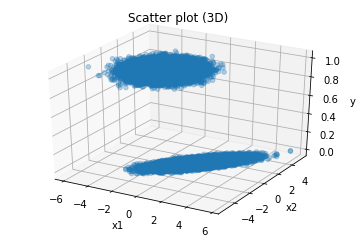

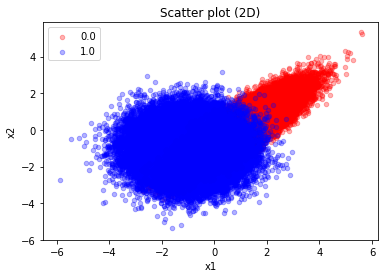

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from pandas import DataFrame

dataset1 = np.array(pd.read_csv('./data/A3_Q1_data.csv'))
feature1 = dataset1[:,0]
feature2 = dataset1[:,1]
labels = dataset1[:,2]
features = dataset1[:,0:1]

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(feature1, feature2, labels, alpha=0.3)
plt.title('Scatter plot (3D)')                  
ax.set_xlabel('x1')
ax.set_ylabel('x2')
ax.set_zlabel('y')

df = DataFrame(dict(x=dataset1[:,0], y=dataset1[:,1], label=dataset1[:,2]))
colors = {0:'red', 1:'blue'}
fig, ax = plt.subplots()
grouped = df.groupby('label')
for key, group in grouped:
    group.plot(ax=ax, kind='scatter', x='x', y='y', label=key, color=colors[key], alpha=0.3)

plt.title('Scatter plot (2D)')
plt.xlabel('x1')
plt.ylabel('x2')
plt.show()

**(e)** 
As we can see from the scatter plots shown, the data is not clearly separable. There are a lot of overlapping datapoints. And yes, logistic regression is a good choice that could produce a sensible prediction for this dataset. Logistic regression could assure that the predicted output is between 0 and 1, while linear regression models may produce unmeaningful prediction results.

**(f)**
I would say that the dataset is clean and well normalized. All features lie within the range of -6 to 6 and there is no missing datapoints. If one wants to further preprocess the dataset, I think there are something that could be done. For instance, he may do some data scaling to make all features to range from -1 to 1 so that it may be easier to visualize and process. Or one could do some data sampling/selection since there are a lot of available datapoints (about 100000), while maybe not all of the datapoints are representative.

In [2]:
import numpy as np
from sklearn import linear_model
data=pd.read_csv('./data/A3_Q1_data.csv')
from sklearn.model_selection import train_test_split
# (g) Logistic function
def sigmoid(X, w):
    return 1 / (1 + np.exp(-np.dot(X,w)))

# (h) Cost function
def cost_function(X, y, w): 
    C_w = - (y*np.log(sigmoid(X, w)) + (1-y)*np.log(1-sigmoid(X, w)))
    return sum(C_w)
# (i) Gradient descent
def gradient(X, y, w, learningRate):
    G = -X*y[:, np.newaxis] + X * sigmoid(X, w)[:, np.newaxis]
    w = w - learningRate*np.sum(G, axis=0)
    return w
# divide data
data=pd.read_csv('./data/A3_Q1_data.csv')
train, test = train_test_split(data, test_size=0.3)
X_train = train.values[:, 0:2]
X_train = np.c_[np.ones(70000), X_train]  
y_train = train.values[:, 2]
# (j) Calculate cost functions
w_train = np.array([0, 0, 0])
learning_rate = 5e-5
print("Calculating cost function for the training set, parameters are initialized to all 0s.")
print("Learning rate is initialized to 5e-5, the process iterates 100 times before stopping.")
for i in range(100):
    w_train = gradient(X_train, y_train, w_train, learning_rate)
    if i%10 == 0:
        print ("Iteration ",i, ', cost function :' ,cost_function(X_train, y_train, w_train))
print('patameters calculate for training set: ', w_train) 

X_test = test.values[:,0:2]
X_test = np.c_[np.ones(30000), X_test]  
y_test = test.values[:, 2]
w_test = np.array([0, 0, 0])
learning_rate = 5e-5
print("\nCalculating cost function for the test set, parameters are initialized to all 0s.")
print("Learning rate is initialized to 5e-5, the process iterates 100 times before stopping.")
for i in range(100):
    w_test = gradient(X_test, y_test, w_test, learning_rate)
    if i%10 == 0:
        print ("Iteration ",i, 'cost function :' ,cost_function(X_test, y_test, w_test))   
print('patameters calculate for test set: ' ,w_test)

# (k) Show this process for different initializations, learning rates,
# and stopping criteria. 
w = np.array([0, 0, 0])
learning_rate = 1e-4
print("\n\nCalculating cost function for the training set, parameters are initialized to all 0s.")
print("Learning rate is initialized to 1e-4, the process iterates 100 times before stopping.")
for i in range(100):
    w = gradient(X_train, y_train, w, learning_rate)
    if i%10 == 0:
        print ("Iteration ",i, ', cost function :' ,cost_function(X_train, y_train, w))
print('patameters calculate for training set: ', w) 

Calculating cost function for the training set, parameters are initialized to all 0s.
Learning rate is initialized to 5e-5, the process iterates 100 times before stopping.
Iteration  0 , cost function : 24884.5534352
Iteration  10 , cost function : 22884.2823536
Iteration  20 , cost function : 22877.8446451
Iteration  30 , cost function : 22877.5168667
Iteration  40 , cost function : 22877.4995671
Iteration  50 , cost function : 22877.4986464
Iteration  60 , cost function : 22877.4985973
Iteration  70 , cost function : 22877.4985947
Iteration  80 , cost function : 22877.4985945
Iteration  90 , cost function : 22877.4985945
patameters calculate for training set:  [-0.18292609 -1.92510963 -0.4192143 ]

Calculating cost function for the test set, parameters are initialized to all 0s.
Learning rate is initialized to 5e-5, the process iterates 100 times before stopping.
Iteration  0 cost function : 11778.3263075
Iteration  10 cost function : 9947.90438139
Iteration  20 cost function : 9874.

**(k)**
In the results shown above, I increased the value of learning rate and the results turned to approach faster to the lowest cost function. So a larger learning rate results in faster learning process. The number of iteration could also affect the final cost function results, but here for this problem, it seemed like 1000 is enough to get a decent result. If we have a much more complex problem with much larger dataset, we might want to increase the iteration number. The choices that I used are able to produce decent results while maintaining a relatively fast runtime, so that is why I am using these values.



Calculating cost function for the training set, parameters are initialized to all 0s.
Learning rate is initialized to 1e-4, the process iterates 100 times before stopping.
Iteration  0 , cost function : 53913.2944472
Iteration  10 , cost function : 29547.3096345
Iteration  20 , cost function : 29545.0709377
Iteration  30 , cost function : 29545.0708401
Iteration  40 , cost function : 29545.0708401
Iteration  50 , cost function : 29545.0708401
Iteration  60 , cost function : 29545.0708401
Iteration  70 , cost function : 29545.0708401
Iteration  80 , cost function : 29545.0708401
Iteration  90 , cost function : 29545.0708401
patameters calculate for training set:  [-0.18832357 -1.92011872 -0.4225793 ]


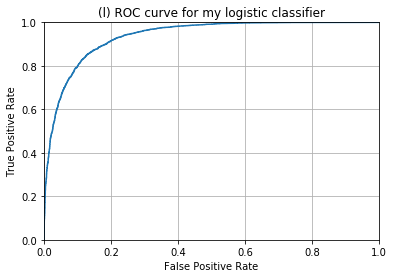

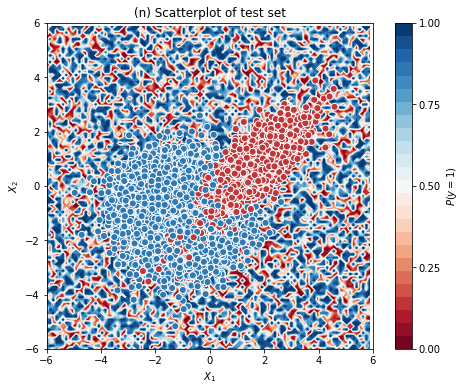

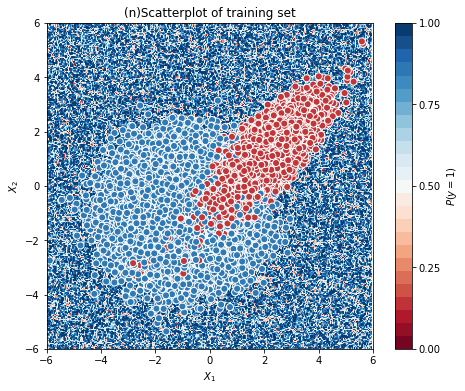

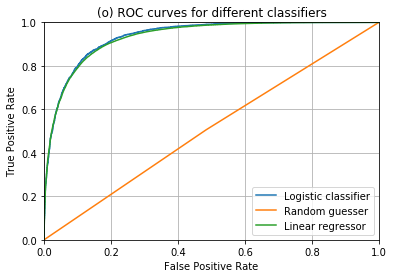

In [3]:
# (l) Test the performance of the trained classifier using K-folds cross validation 
# and draw ROC curve to visualize performance
from sklearn import metrics
import matplotlib.pyplot as plt
# import data
X = data.values[:, 0:2]
X = np.c_[np.ones(100000), X]  
y = data.values[:, 2]

# 10-folds cross validation
from sklearn.model_selection import StratifiedKFold
skf = StratifiedKFold(n_splits=10)
skf.get_n_splits(X, y)
for train_index, test_index in skf.split(X, y):
    X_tr, X_te = X[train_index], X[test_index] 
    y_tr, y_te = y[train_index], y[test_index]

# Test the trained classifier
w = np.array([0, 0, 0])
learning_rate = 1e-4
print("\n\nCalculating cost function for the training set, parameters are initialized to all 0s.")
print("Learning rate is initialized to 1e-4, the process iterates 100 times before stopping.")
for i in range(100):
    w = gradient(X_tr, y_tr, w, learning_rate)
    if i%10 == 0:
        print ("Iteration ",i, ', cost function :' ,cost_function(X_tr, y_tr, w))
print('patameters calculate for training set: ', w) 
plt.figure(1)
y_pred = sigmoid(X_te, w)
fpr, tpr, thresholds = metrics.roc_curve(y_te, y_pred)
plt.plot(fpr, tpr)
plt.xlim([0.0,1.0])
plt.ylim([0.0,1.0])
plt.title('(l) ROC curve for my logistic classifier')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.grid(True)
plt.show()
# (n) Make two plots - one of your training data, 
# and one for your test data - with the data scatterplotted
# and the decision boundary for your classifier.
from sklearn.linear_model import LogisticRegression
from sklearn.datasets import make_classification

xx, yy = np.mgrid[-6:6:.12, -6:6:.12]
grid = np.c_[xx.ravel(), yy.ravel()]
plt.figure(2)
probs = y_pred.reshape(xx.shape)
f, ax = plt.subplots(figsize=(8, 6))
contour = ax.contourf(xx, yy, probs, 25, cmap="RdBu", vmin=0, vmax=1)
ax_c = f.colorbar(contour)
ax_c.set_label("$P(y = 1)$")
ax_c.set_ticks([0, .25, .5, .75, 1])

ax.scatter(X_te[:, 1], X_te[:, 2], c=y_te, s=50,
           cmap="RdBu", vmin=-.2, vmax=1.2,
           edgecolor="white", linewidth=1)

ax.set(aspect="equal",
       xlim=(-6, 6), ylim=(-6, 6),
       xlabel="$X_1$", ylabel="$X_2$")
plt.title('(n) Scatterplot of test set')
# training set
plt.figure(3)
y_tr_pred = sigmoid(X_tr, w)
xx, yy = np.mgrid[-6:6:.04, -6:6:.04]
grid = np.c_[xx.ravel(), yy.ravel()]
probs = y_tr_pred.reshape(xx.shape)
f, ax = plt.subplots(figsize=(8, 6))
contour = ax.contourf(xx, yy, probs, 25, cmap="RdBu", vmin=0, vmax=1)
ax_c = f.colorbar(contour)
ax_c.set_label("$P(y = 1)$")
ax_c.set_ticks([0, .25, .5, .75, 1])

ax.scatter(X_tr[:, 1], X_tr[:, 2], c=y_tr, s=50,
           cmap="RdBu", vmin=-.2, vmax=1.2,
           edgecolor="white", linewidth=1)

ax.set(aspect="equal",
       xlim=(-6, 6), ylim=(-6, 6),
       xlabel="$X_1$", ylabel="$X_2$")
plt.title('(n)Scatterplot of training set')
plt.show()
# (o) Compare your trained model to random guessing as well 
# as using linear regression. Show ROC curves for both
# and your model all on one plot.

# logistic classifier
plt.figure(4)
from random import randint
fpr, tpr, thresholds = metrics.roc_curve(y_te, y_pred)
plt.plot(fpr, tpr)
plt.xlim([0.0,1.0])
plt.ylim([0.0,1.0])
plt.grid(True)

# random guess classifier
k = 0
randomguess = np.zeros(shape=(10000,))
for k in range(10000):
    randomguess[k] = randint(0, 1)
fpr, tpr, thresholds = metrics.roc_curve(y_te, randomguess)
plt.plot(fpr, tpr)
plt.xlim([0.0,1.0])
plt.ylim([0.0,1.0])
plt.grid(True)

# linear regressor
from sklearn import linear_model
regr = linear_model.LinearRegression()
regr.fit(X_te, y_te)
y_linear_pred = regr.predict(X_tr)
fpr, tpr, thresholds = metrics.roc_curve(y_tr, y_linear_pred)
plt.plot(fpr, tpr)
plt.xlim([0.0,1.0])
plt.ylim([0.0,1.0])
plt.title('(o) ROC curves for different classifiers')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.grid(True)

plt.legend(['Logistic classifier', 'Random guesser', 'Linear regressor'], loc='lower right')
plt.show()


**(m)** 
We use cross validation since it is a model evaluation method that is better than residuals. All observations are used for both training and validation. Cross validation helps limit problems like overfitting and gives an insight on how the model will generalize to an independent set.

**(n)**
As we can see from the scatterplot, since I am using 10 folds cross validation, the training set has 90000 datapoints while the test set only has 10000. I assume that the probability threshold is 0.5 and everything above 0.5 belongs to class 1, and vice versa. The decision boundary for test set is pretty overfitted and hard to generalize, while that of test set is more clear. Here, I am actually not so sure if I am drawing the decision boundary correctly and that may cause some trouble visualizing the results. But anyway, there are still plenty place to improve. The gradient descent parameters that I used might not be the most appropriate values.
 
**(o)** 
From the ROC curves shown above, we could easily see that the random guess classifier performs poorly, while the logistic classifier performs pretty well. However, here, the linear regressor also performs surprisingly well. I was thinking that the linear regressor should perform worse than logistic regressor due to the fact that there are a lot of overlapping values for x1 and x2 while they may belong to different classes. Perhaps I am not implementing the linear classifier correctly, or it is just that the linear one could indeed perform well for this problem.

## 2

### [20 points] Digits classification

**(a)** Construct your dataset from the [MNIST dataset](http://yann.lecun.com/exdb/mnist/) of handwritten digits, which has a training set of 60,000 examples, and a test set of 10,000 examples. The digits have been size-normalized and centered in a fixed-size image.

Your goal is to determine whether or not an example is a 3, therefore your binary classifier will seek to estimate $y=1$ if the digit is a 3, and $y=0$ otherwise. Create your dataset by transforming your labels into a binary format. 

**(b)** Plot 10 examples of each class 0 and 1, from the training dataset.

**(c)** How many examples are present in each class? Are the classes balanced? What issues might this cause?

**(d)** Using cross-validation, train and test a classifier. Compare your performance against (1) a classifier that randomly guesses the class, and (2) a classifier that guesses that all examples are NOT 3's. Plot corresponding ROC curves and precision-recall curves. Describe the algorithm's performance and explain any discrepancies you find.

**(e)** Using a linear model classifier (e.g. logistic regression) apply lasso regularization and retrain the model and evaluate its performance over a range of values on the regularization coefficient. You can implement this using the [LogisticRegression](http://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html) module and activating the 'l1' penalty; the parameter $C$ is the inverse of the regularization strength. As you vary the regularization coefficient, plot (1) the number of model parameters that are estimated to be nonzero; (2) the logistic regression cost function, which you created a function to evaluate in the Question 1; (3) $F_1$-score, and (4) Area Under the Curve (AUC). Describe the implications of your findings.

**ANSWER**

In [4]:
import numpy as np
from matplotlib import pyplot as plt
%matplotlib inline
from sklearn.datasets import fetch_mldata
from sklearn.model_selection import train_test_split

In [5]:
#download the dataset, change data_home to the path you want to store the files.
mnist = fetch_mldata('MNIST original', data_home='/Users/yifan/ece590/data')

**(a). & (b). **create the dataset and plot 10 examples of each class

(70000, 784)
(70000,)


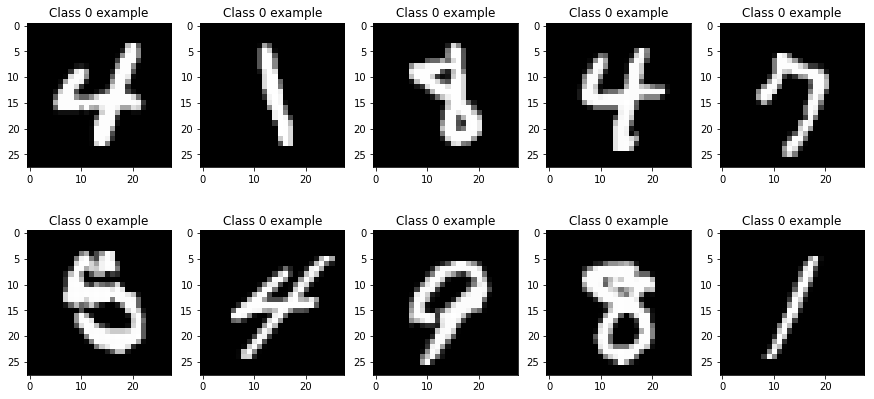

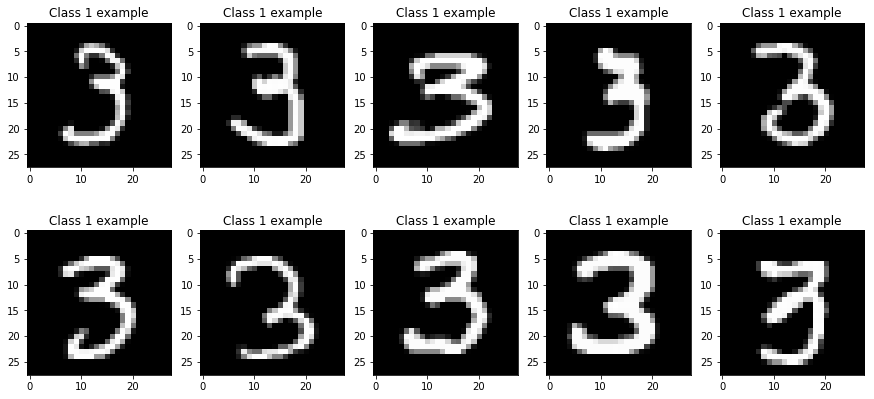

In [6]:
print(mnist.data.shape) #images
print(mnist.target.shape) #labels
#split the data into training and test sets
train_img, test_img, train_lbl, test_lbl = train_test_split(
    mnist.data, mnist.target, test_size=1/7.0, random_state=0)

plt.figure(figsize=(15,7))
for i, (image, label) in enumerate(zip(train_img[0:10], train_lbl[0:10])):
    plt.subplot(2,5, i+1)
    plt.imshow(np.reshape(image, (28,28)), cmap=plt.cm.gray)
    plt.title('Class 0 example')
    
plt.figure(figsize=(15,7))
class1 = []
for i in range(1000):
    if train_lbl[i]==3:
        class1.append(i)
        plt.subplot(2,5, len(class1))
        plt.imshow(np.reshape(train_img[i], (28,28)), cmap=plt.cm.gray)
        plt.title('Class 1 example')
    if len(class1)==10:
        break
        

**(c).** 

In [7]:
count3=0
not3=0
train_lbl_new = np.zeros(shape=(60000,))
for j in range(60000):
    if train_lbl[j]==3:
        count3+=1
        train_lbl_new[j] = 1
    else:
        not3+=1
        train_lbl_new[j] = 0

print('Class 1 examples in my chosen training set: %i\n' %count3)
print('Class 0 examples in my chosen training set: %i\n' %not3)

test_lbl_new = np.zeros(shape=(10000,))
for j in range(10000):
    if test_lbl[j]==3:
        test_lbl_new[j] = 1
    else:
        test_lbl_new[j] = 0

Class 1 examples in my chosen training set: 6103

Class 0 examples in my chosen training set: 53897



Based on the results calculated below, there are 6103 examples of class 1 and 53897 examples of class 0. So about 10.17% of the testset is class 1. As for the dataset, this number makes sense. Since there are 10 digits present and there should be 10% of each digit. But, now we are dealing with a binary classification problem, the two classes are quite unbalanced. This may cause some issues - if we train our classifier without balancing, the classifier has a high chance of favoring one of the classes with the most examples.

**(d).**

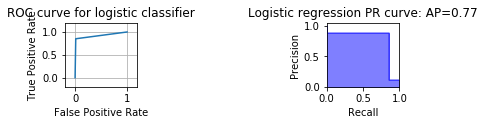

Accuracy of logistic classifier when cross validating is 0.973200


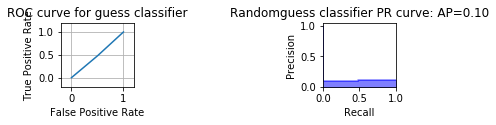

Accuracy of randomguess classifier when cross validating is 0.495600


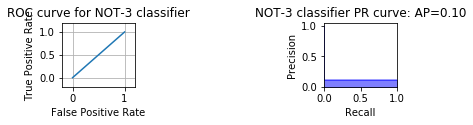

Accuracy of NOT-3 classifier when cross validating is 0.896200


In [8]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn import metrics
from sklearn.linear_model import LogisticRegression

# logistic regression
logisticRegr = LogisticRegression(solver = 'lbfgs')
logisticRegr.fit(train_img, train_lbl_new)
prediction = logisticRegr.predict(test_img)
fpr, tpr, thresholds = metrics.roc_curve(test_lbl_new, prediction)
plt.subplot(3,4,1)
plt.plot(fpr, tpr)
plt.xlim([-0.2,1.2])
plt.ylim([-0.2,1.2])
plt.title('ROC curve for logistic classifier')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.grid(True)
from sklearn.metrics import average_precision_score
average_precision = average_precision_score(test_lbl_new, prediction)
from sklearn.metrics import precision_recall_curve
precision, recall, _ = precision_recall_curve(test_lbl_new, prediction)
plt.subplot(3,4,4)
plt.step(recall, precision, color='b', alpha=0.5,
         where='post')
plt.fill_between(recall, precision, step='post', alpha=0.5,
                 color='b')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.ylim([0.0, 1.05])
plt.xlim([0.0, 1.0])
plt.title('Logistic regression PR curve: AP={0:0.2f}'.format(average_precision))
plt.show()
print('Accuracy of logistic classifier when cross validating is %f' %accuracy_score(test_lbl_new, prediction))

# random guess regression
from random import randint
k = 0
randomguess = np.zeros(shape=(10000,))
for k in range(10000):
    randomguess[k] = randint(0, 1)
fpr, tpr, thresholds = metrics.roc_curve(test_lbl_new, randomguess)
plt.subplot(3,4,5)
plt.plot(fpr, tpr)
plt.xlim([-0.2,1.2])
plt.ylim([-0.2,1.2])
plt.title('ROC curve for guess classifier')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.grid(True)
average_precision = average_precision_score(test_lbl_new, randomguess)
precision, recall, _ = precision_recall_curve(test_lbl_new, randomguess)
plt.subplot(3,4,8)
plt.step(recall, precision, color='b', alpha=0.5,
         where='post')
plt.fill_between(recall, precision, step='post', alpha=0.5,
                 color='b')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.ylim([0.0, 1.05])
plt.xlim([0.0, 1.0])
plt.title('Randomguess classifier PR curve: AP={0:0.2f}'.format(average_precision))
plt.show()
print('Accuracy of randomguess classifier when cross validating is %f' %accuracy_score(test_lbl_new, randomguess))

# not-3 regression
all0 = np.zeros(shape=(10000,))
fpr, tpr, thresholds = metrics.roc_curve(test_lbl_new, all0)
plt.subplot(3,4,9)
plt.plot(fpr, tpr)
plt.xlim([-0.2,1.2])
plt.ylim([-0.2,1.2])
plt.title('ROC curve for NOT-3 classifier')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.grid(True)
plt.subplot(3,4,12)
average_precision = average_precision_score(test_lbl_new, all0)
precision, recall, _ = precision_recall_curve(test_lbl_new, all0)
plt.step(recall, precision, color='b', alpha=0.5,
         where='post')
plt.fill_between(recall, precision, step='post', alpha=0.5,
                 color='b')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.ylim([0.0, 1.05])
plt.xlim([0.0, 1.0])
plt.title('NOT-3 classifier PR curve: AP={0:0.2f}'.format(average_precision))
plt.show()
print('Accuracy of NOT-3 classifier when cross validating is %f' %accuracy_score(test_lbl_new, all0))



As we can see from the ROC curves and PR curves, the logistic regression/classification model has the best performance. Specifically, in this cross-validation test, logistic regression has an accuracy of 97%. The classifier that assumes all classes are 0 (all numbers are not 3) has a pretty good accuracy of 89%, since we know that 10% of the total images are actually 3, and this classifier could achieve good accuracy. But the random guess classifier that randomly chooses 1 or 0 has a pretty bad accuracy.

In [12]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import f1_score
from sklearn import metrics

logisticRegr = LogisticRegression(penalty='l1')
logisticRegr.fit(train_img, train_lbl_new)
pred1 = logisticRegr.predict(test_img)
score = logisticRegr.score(test_img, test_lbl_new)
coef = logisticRegr.coef_
print('Testing regularization coefficient C=1...')
print('Nonzero model parameters count: ', np.count_nonzero(coef))
w = coef
X = test_img  
y = test_lbl_new
print('Cost function: ', cost_function(X, y, np.ravel(w)))
print('The mean accuracy of the logistic regression model (C=1) is %f' %score)
print('The F1 score of the logistic regression model (C=1) is %f' %f1_score(test_lbl_new, pred1,average='macro'))
fpr, tpr, thresholds = metrics.roc_curve(test_lbl_new, pred1)
print('Area under the Curve (AUC) = ',metrics.auc(fpr, tpr))


logisticRegr = LogisticRegression(penalty='l1',C=11)
logisticRegr.fit(train_img, train_lbl_new)
pred1 = logisticRegr.predict(test_img)
score = logisticRegr.score(test_img, test_lbl_new)
coef = logisticRegr.coef_
print('\n\nTesting regularization coefficient C=11...')
print('Nonzero model parameters count: ', np.count_nonzero(coef))
w = coef
X = test_img  
y = test_lbl_new
print('Cost function: ', cost_function(X, y, np.ravel(w)))
print('The mean accuracy of the logistic regression model (C=11) is %f' %score)
print('The F1 score of the logistic regression model (C=11) is %f' %f1_score(test_lbl_new, pred1,average='macro'))
fpr, tpr, thresholds = metrics.roc_curve(test_lbl_new, pred1)
print('Area under the Curve (AUC) = ',metrics.auc(fpr, tpr))



logisticRegr = LogisticRegression(penalty='l1', C=0.005)
logisticRegr.fit(train_img, train_lbl_new)
pred1 = logisticRegr.predict(test_img)
score = logisticRegr.score(test_img, test_lbl_new)
coef = logisticRegr.coef_
print('\n\nTesting regularization coefficient C=0.005...')
print('Nonzero model parameters count: ', np.count_nonzero(coef))
w = coef
X = test_img  
y = test_lbl_new
print('Cost function: ', cost_function(X, y, np.ravel(w)))
print('The mean accuracy of the logistic regression model (C=5e-3) is %f' %score)
print('The F1 score of the logistic regression model (C=5e-3) is %f' %f1_score(test_lbl_new, pred1,average='macro'))
fpr, tpr, thresholds = metrics.roc_curve(test_lbl_new, pred1)
print('Area under the Curve (AUC) = ',metrics.auc(fpr, tpr))


Testing regularization coefficient C=1...
Nonzero model parameters count:  621
Cost function:  4364.00571809
The mean accuracy of the logistic regression model (C=1) is 0.974500
The F1 score of the logistic regression model (C=1) is 0.929511
Area under the Curve (AUC) =  0.917628552841


Testing regularization coefficient C=11...
Nonzero model parameters count:  640
Cost function:  4394.19009135
The mean accuracy of the logistic regression model (C=11) is 0.974300
The F1 score of the logistic regression model (C=11) is 0.928895
Area under the Curve (AUC) =  0.916665161704


Testing regularization coefficient C=0.005...
Nonzero model parameters count:  439
Cost function:  1072.9545465
The mean accuracy of the logistic regression model (C=5e-3) is 0.975400
The F1 score of the logistic regression model (C=5e-3) is 0.932208
Area under the Curve (AUC) =  0.921537908506


**(e)**
From the calculation results shown above, I drew the conclusion that as C (the inverse of regularization strength) increases, the regularization strength decreases and thus, the AUC, accuracy of the regression and F1 score are lowered. At the same time, the cost function output and nonzero model parameters needed to fit the model increase. So in general, as regularization strength increases, the model tends to perform better.

## 3

### [40 points] Supervised learning exploration

For this exercise, you will construct and implement a supervised learning problem solution/experiment. Describe your process and answer these questions clearly and thoroughly. Part of the grade in this assignment is devoted to the quality and professionalism of your work.

**(a)** Identify a question or problem that's of interest to you and that could be addressed using classification or regression. Explain why it's interesting and what you'd like to accomplish. This should exhibit creativity, and you are not allowed to use the Iris dataset, the Kaggle Titanic dataset, or the Kaggle chocolate dataset.

**(b)** Download the data and plot the data to describe it.

**(c)** Formulate your supervised learning question: (a) What is your target variable (what are you trying to predict) and what predictors do you have available? 
v Does your dataset require any preprocessing: is it clean (no missing values or erroneous data) and normalized (are each of the predictors of the same magnitude)? 

**(d)** What supervised learning technique will you use and why? 

**(e)** How will you evaluate performance and know whether you succeeded (e.g. ROC curves for binary classification, mean square error or $R^2$ for regression)?

**(f)** Divide your dataset into training and testing datasets OR implement cross validation. Explain your approach and why you adopted it.

**(g)** Run your analysis and show your performance. Include plots of your data and of performance.

**(h)** Describe how your system performend, where your supervised learning algorithm performed well, and where it did not, and how you could improve it.

**(i)** Write a brief summary / elevator pitch for this work that you would put on LinkedIn to descrive this project to future employers. This should focus on the high level impact and importance and overall takeaways and not on the nitty-gritty details.

**ANSWER**

**(a)**
I myself am very interested in chemistry, especially food science. Recently, I found a great dataset on Kaggle that covers a topic related to my interest and also can be viewed as a good regression or classification task. This dataset is related to red variants of the Portuguese "Vinho Verde" wine. There are some input quantitative variables based on physicochemical tests, and the target that I want to accomplish is evaluating the quality of the sample wine, which is also a quantitative output.  

**(b)**
Since there are 11 input variables, it is not easy to visualize the relationship between the output variable and input features, and it is not very useful to draw all variables on the same plot. Here, I am drawing some 2D plots to demonstrate the relationship between the output and some of the input variables.

In [94]:
# (b) Load the data
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn import metrics
from matplotlib import pyplot as plt
dataset = pd.read_csv('./data/winequality-red.csv')

X = np.array(pd.read_csv('./data/winequality-red_X.csv'))
y = np.array(pd.read_csv('./data/winequality-red_y.csv'))

dataset

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
1,7.8,0.880,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8,5
2,7.8,0.760,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8,5
3,11.2,0.280,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8,6
4,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
5,7.4,0.660,0.00,1.8,0.075,13.0,40.0,0.99780,3.51,0.56,9.4,5
6,7.9,0.600,0.06,1.6,0.069,15.0,59.0,0.99640,3.30,0.46,9.4,5
7,7.3,0.650,0.00,1.2,0.065,15.0,21.0,0.99460,3.39,0.47,10.0,7
8,7.8,0.580,0.02,2.0,0.073,9.0,18.0,0.99680,3.36,0.57,9.5,7
9,7.5,0.500,0.36,6.1,0.071,17.0,102.0,0.99780,3.35,0.80,10.5,5


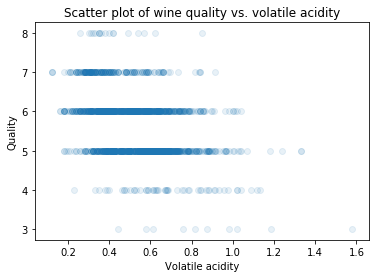

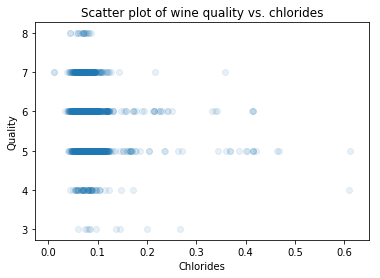

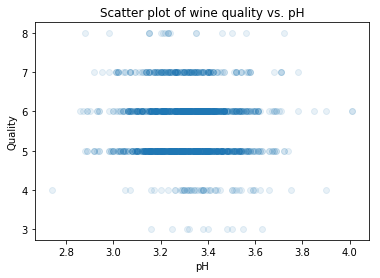

In [95]:
plt.figure(1)
plt.scatter(X[:,1], y, alpha=0.1)
plt.title('Scatter plot of wine quality vs. volatile acidity')
plt.xlabel('Volatile acidity')
plt.ylabel('Quality')

plt.figure(2)
plt.scatter(X[:,4], y, alpha=0.1)
plt.title('Scatter plot of wine quality vs. chlorides')
plt.xlabel('Chlorides')
plt.ylabel('Quality')

plt.figure(3)
plt.scatter(X[:,8], y, alpha=0.1)
plt.title('Scatter plot of wine quality vs. pH')
plt.xlabel('pH')
plt.ylabel('Quality')

# set threshold to reduce the number of classes
for i in range(1599):
    if y[i]>=7:
        y[i]=1
    else:
        y[i]=0

# (f) Cross-validation split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)


**(c)**

The target output that I want to predict is the quality of the wine (score between 0 and 10). But since there are 11 different classes, it is not easy to get a good prediction. So what worths doing is setting an cutoff for dependent variable(wine quality). For example, a quality of 7 or higher is classified as "good/1", and the remainder is "not as good/0". The available input predictors are fixed acidity, volatile acidity, citric acid, residual sugar, chlorides, free sulfur dioxide, total sulfur dioxide, density, pH, sulphates and alcohol. The dataset is clean with no missing values. And I am assuming that the dataset is normalized so that I could explore the relationship between all the input variables and output.

**(d)**

The supervised learning techniques that I will use is classification, including KNN models and other models. The reason is because the dataset consists of complete quantitative variables for both input and output, and that I have transformed the output to be a binary class. So using classification models could provide more accurate predictions to compare.

**(e)**

This problem is a classification problem, but it could also be interpreted as a regression problem. However, it will be hard to get a good result by regression since there are too many input features while the size of the dataset is not large enough to accurately summurize these variables. So it is easier to use a classification model and transform the output into lower degree output such as the binary classes. I will use the average accuracy score to evaluate the performance of the models.

**(f)** 

I am using cross-validation methods to split my dataset into a training set and a test set. The training set contains 80% of the total data and the test set contains 20%. This is done because of the absence of a very large designated test set that can be used to directly estimate the test error rate.

the accuracy of KNN classifier is 0.896875
the accuracy of decision tree classifier is 0.90625
the accuracy of logistic classifier is 0.915625


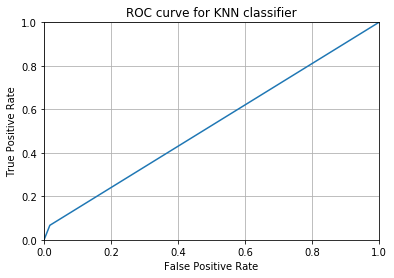

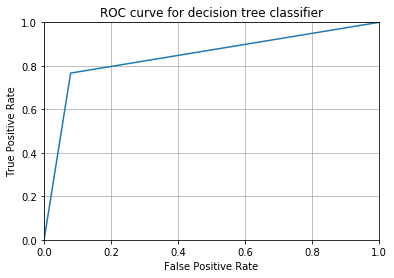

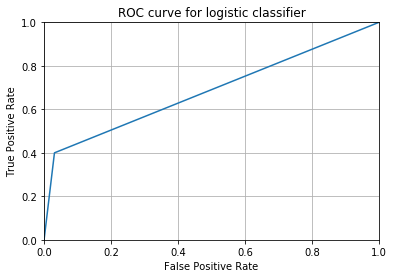

In [86]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=10)
knn.fit(X_train, np.ravel(y_train))
y_pred = knn.predict(X_test)
print("the accuracy of KNN classifier is", accuracy_score(y_test, y_pred))
fpr, tpr, thresholds = metrics.roc_curve(y_test, y_pred)
plt.figure(1)
plt.plot(fpr, tpr)
plt.xlim([0.0,1.0])
plt.ylim([0.0,1.0])
plt.title('ROC curve for KNN classifier')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.grid(True)

from sklearn.tree import DecisionTreeClassifier
clf = DecisionTreeClassifier(random_state=0)
clf.fit(X_train, np.ravel(y_train))
y_pred = clf.predict(X_test)
print("the accuracy of decision tree classifier is", accuracy_score(y_test, y_pred))
fpr, tpr, thresholds = metrics.roc_curve(y_test, y_pred)
plt.figure(2)
plt.plot(fpr, tpr)
plt.xlim([0.0,1.0])
plt.ylim([0.0,1.0])
plt.title('ROC curve for decision tree classifier')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.grid(True)

from sklearn import linear_model
logistic = linear_model.LogisticRegression()
logistic.fit(X_train, np.ravel(y_train))
y_pred = logistic.predict(X_test)
print("the accuracy of logistic classifier is", accuracy_score(y_test, y_pred))
fpr, tpr, thresholds = metrics.roc_curve(y_test, y_pred)
plt.figure(3)
plt.plot(fpr, tpr)
plt.xlim([0.0,1.0])
plt.ylim([0.0,1.0])
plt.title('ROC curve for logistic classifier')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.grid(True)

**(g)**

From the results shown above, all these classifiers have pretty good accuracy of about 90 percent. But decision tree classifier has the best ROC curve, while KNN has the worst. KNN performs poorly since it actually does not learn anything from the training data and simply uses the training data for classification. And also, since there are multiple features existing, the nearest neighbors in terms of distance found by KNN may not reflect the true class/label of the given data point. The DecisionTree model is a good model to use for this problem, since the model implicitly performs variable screening or feature selection, and nonlinear relationships between parameters do not affect the tree performance. If one wants to further improve the performance, I think that it is necessary to increase the size of the dataset.

**(f)**

This small machine learning project uses supervised learning techniques to learn and predict the quality (measured between 0 to 10) of the Portuguese "Vinho Verde" wine, given 11 different physiochemical parameters as input features. Due to the fact that there are many features and output classes, I set a threshold for the dependent variable (wine quality) at 7 to simplify the classification process while maintaining practical and meaningful results. 

Specifically, the dataset was split into a training set that contains 80% of the total data, and a test set that contains the remaining 20%. K nearest neighbor classifier, logistic classifier and decision tree classifer are used to train and test the data, and the average accuracy score and ROC curves are used to measure the performance of the models. All three models got pretty accurate results of 90% accuracy, while KNN performs relatively the worst and DecisionTree performs the best. 